# Exercise 4 Solution - Linear Regression

### Task

Implement a linear regression model with the provided class structure. Write the following member functions:

* the forward prediction
* the cost function computation
* the gradient computation
* the training algorithm

In [1]:
import numpy as np
import matplotlib.pyplot as plt

generate noisy training and test data with an 80/20 split

In [8]:
np.random.seed(7654)
xTrain = np.random.randn(80)
yTrain = 2*xTrain + 3 + np.random.randn(80)
xTest = np.random.randn(20)
yTest = 2*xTest + 3 + np.random.randn(20)

mathematical background for the implementation

In [15]:
class LinearRegression:
    def __init__(self):
        self.weight = 0
        self.bias = 0

    def forward(self, x):
        y = self.weight * x + self.bias
        return y

    def costFunction(self, x, y):
        cost = np.mean((self.forward(x) - y) ** 2)
        return cost

    def gradient(self, x, y):
        gradientWeight = np.mean((2* (self.forward(x) - y) * x))
        gradientBias = np.mean((2 * (self.forward(x) - y)))
        return gradientWeight, gradientBias

    def train(self, epochs, lr, xTrain, yTrain, xTest, yTest):
        for epoch in range(epochs):
            costTrain = self.costFunction(xTrain, yTrain)
            costTest = self.costFunction(xTest, yTest)


            gradientWeight, gradientBias = self.gradient(xTrain, yTrain)
            self.weight -= lr * gradientWeight
            self.bias -= lr * gradientBias

            if epoch % 10 == 0:
                string = "Epoch: {}/{}\t\tTraining cost = {:.2e}\t\tValidation cost = {:.2e}"
                print(string.format(epoch, epochs, costTrain, costTest))

model training

In [16]:
lr = 5e-2
epochs = 101

model = LinearRegression()
model.train(epochs, lr, xTrain, yTrain, xTest, yTest)

Epoch: 0/101		Training cost = 1.52e+01		Validation cost = 1.51e+01
Epoch: 10/101		Training cost = 2.51e+00		Validation cost = 2.15e+00
Epoch: 20/101		Training cost = 1.04e+00		Validation cost = 8.42e-01
Epoch: 30/101		Training cost = 8.76e-01		Validation cost = 7.52e-01
Epoch: 40/101		Training cost = 8.57e-01		Validation cost = 7.62e-01
Epoch: 50/101		Training cost = 8.55e-01		Validation cost = 7.70e-01
Epoch: 60/101		Training cost = 8.54e-01		Validation cost = 7.74e-01
Epoch: 70/101		Training cost = 8.54e-01		Validation cost = 7.75e-01
Epoch: 80/101		Training cost = 8.54e-01		Validation cost = 7.75e-01
Epoch: 90/101		Training cost = 8.54e-01		Validation cost = 7.76e-01
Epoch: 100/101		Training cost = 8.54e-01		Validation cost = 7.76e-01


visualize the predictions

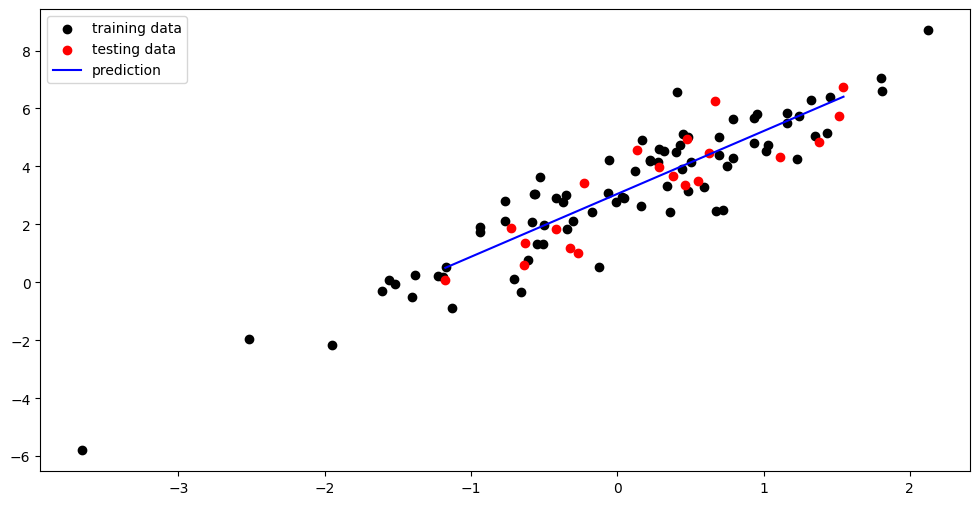

In [19]:
yTrainPred = model.forward(xTrain)
yTestPred = model.forward(xTest)

x = np.linspace(np.min(xTest), np.max(xTest), 100)
yPred = model.forward(x)

fig, ax = plt.subplots(figsize=(12, 6))
ax.scatter(xTrain, yTrain, color="k", label="training data")
ax.scatter(xTest, yTest, color="r", label="testing data")
ax.plot(x, yPred, "b", label="prediction")
ax.legend()
plt.show()

In [21]:
print('Model Bias, b = ', model.bias)
print('Model Weight, w = ', model.weight)

x = np.matrix(xTrain).T
y = np.matrix(yTrain).T
X = np.hstack([np.ones((x.shape[0], 1)), x])

theta = np.linalg.inv(X.T * X) * X.T * y

print("\nCompare with Normal equation weights (bias and slope):\n", theta)

Model Bias, b =  3.0512817185027297
Model Weight, w =  2.1695230642637213

Compare with Normal equation weights (bias and slope):
 [[3.05134874]
 [2.16954833]]


## Normal Equations

In [23]:
x = np.matrix(range(4)).T
y = 2 * x + 3
print('x \n', x)
print('y \n', y)

X = np.hstack([np.ones((x.shape[0], 1)), x])

X_transpose_X = X.T * X
X_transpose_y = X.T * y
theta = np.linalg.inv(X_transpose_X) * X_transpose_y

print("X.T * X:\n", X_transpose_X)
print("X.T * y:\n", X_transpose_y)

print("Weights (bias and slope):\n", theta)

x 
 [[0]
 [1]
 [2]
 [3]]
y 
 [[3]
 [5]
 [7]
 [9]]
X.T * X:
 [[ 4.  6.]
 [ 6. 14.]]
X.T * y:
 [[24.]
 [46.]]
Weights (bias and slope):
 [[3.]
 [2.]]


In [29]:
x = np.matrix(xTrain).T
y = np.matrix(yTrain).T
X = np.hstack([np.ones((x.shape[0], 1)), x])

X_transpose_X = X.T * X
X_transpose_y = X.T * y
theta = np.linalg.inv(X_transpose_X) * X_transpose_y

print("Weights (bias and slope):\n", theta)

Weights (bias and slope):
 [[3.05134874]
 [2.16954833]]
